# Seaborn parte 1

### Plots de distribuição

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


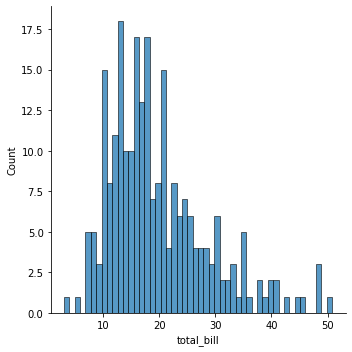

In [5]:
sns.displot(tips['total_bill'], kde=False, bins=50);

FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)

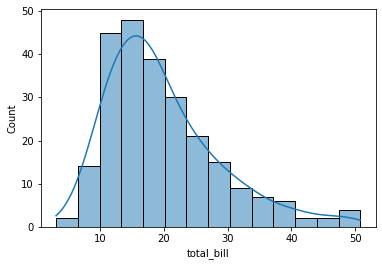

In [6]:
sns.histplot(tips['total_bill'], kde=True);

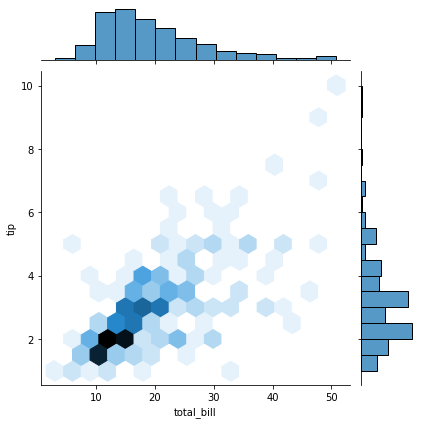

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

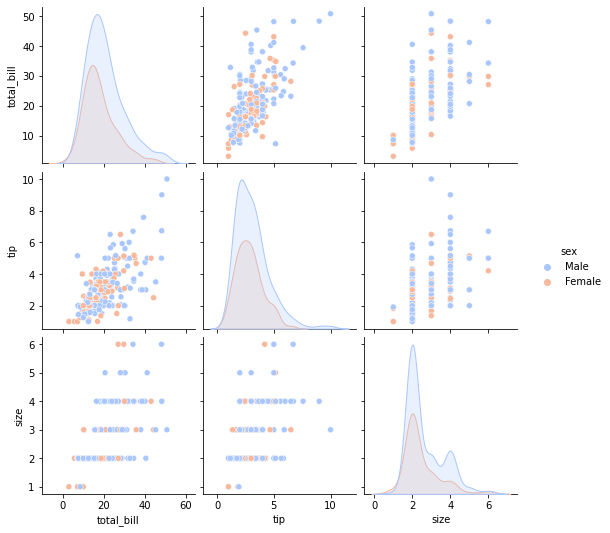

In [8]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

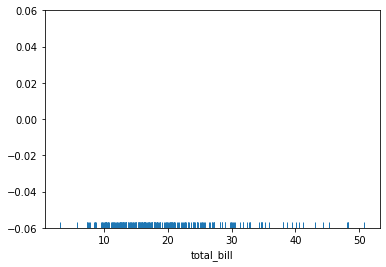

In [10]:
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

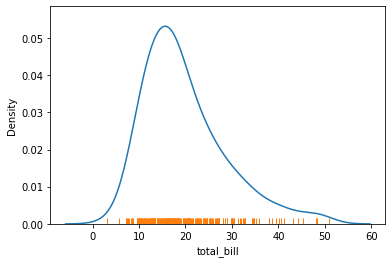

In [12]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots são [Plots de estimativa de densidade kernel](http://en.wikipedia.org/wiki/Kernel_density_estimation#Pratical_estimation_of_the_bandwidth). Esses plots KDE substituem cada observação com uma distribuição Gaussiana (Normal) centrada em torno desse valor. Por exemplo:

(0.0, 1.0)

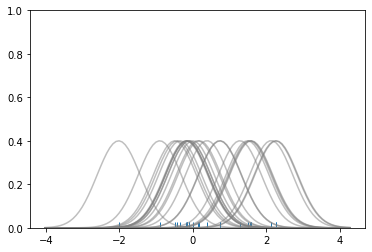

In [13]:
# Não se preocupe em entender este código!
# É apenas para o diagrama abaixo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min,x_max,100)

# Configure a largura de banda. Para obter informações sobre isso:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

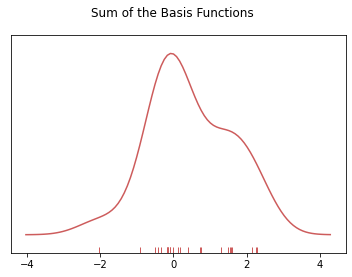

In [14]:
# Para obter o gráfico do kde podemos somar essas funções de base.

# Traça a soma da função de base
sum_of_kde = np.sum(kernel_list,axis=0)

# Plota a figura
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adiciona o rugplot inicial
sns.rugplot(dataset,c = 'indianred')

# Livrar-se das marcas de "y-tick"
plt.yticks([])

# Define o título
plt.suptitle("Sum of the Basis Functions")